# This notebook will demontrate how to create a portfolio using Efficient Frontier optimization for every stock present on S&P500 Fund


In [1]:
import random
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from pypfopt import CovarianceShrinkage, expected_returns, plotting, risk_models
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt.efficient_frontier import EfficientFrontier
from tqdm.notebook import tqdm

In [2]:
data = pd.read_csv(
    "stock_portfolio_data/s&p500_stocks.csv", sep=";", encoding="latin-1"
)
start_date = "2013-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")
stocks = data["Symbol"]
print(stocks)

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object


In [3]:
df_tech_stocks = pd.DataFrame()

for stock in tqdm(stocks):
    df_tech_stocks[stock] = yf.download(stock, start=start_date, end=end_date)[
        "Adj Close"
    ]
df_tech_stocks

  0%|          | 0/503 [00:00<?, ?it/s]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

$BF.B: possibly delisted; No price data found  (1d 2013-01-01 -> 2024-08-02)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,54.596699,13.553100,25.612391,21.801901,55.955933,38.340000,2.530000,7.649205,20.467266,27.142792,...,73.861298,170.446320,95.058754,18.827536,23.618402,38.742615,40.959999,59.842167,17.243742,NaN
2013-01-03,54.533310,13.341236,26.587349,21.621876,55.753387,37.750000,2.490000,7.607484,19.948675,27.240005,...,74.615875,169.904831,96.081223,18.772526,23.541105,38.984901,41.000000,60.699596,17.267265,NaN
2013-01-04,54.936546,13.485976,26.427509,21.348724,56.061295,38.130001,2.590000,7.788282,19.698841,27.777935,...,74.594322,171.012497,97.240593,18.841295,23.506760,39.411800,40.669998,61.008953,17.761293,NaN
2013-01-07,55.005653,13.337040,26.643278,21.392179,55.818214,37.939999,2.670000,7.544899,19.623144,27.577021,...,74.378731,169.945816,97.570663,18.641878,23.197567,39.163746,40.900002,61.159241,17.675035,NaN
2013-01-08,55.011417,13.590858,26.651266,20.926601,56.142307,38.139999,2.670000,7.544899,19.850262,27.356667,...,74.012215,167.106827,97.490158,18.676258,22.914148,37.519661,40.930000,61.247601,17.322159,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,127.160004,84.183556,105.239998,185.160004,328.459991,542.440002,139.990005,17.349627,94.820000,137.320007,...,283.089996,970.340027,81.610001,57.360001,140.839996,128.050003,325.980011,111.290001,52.290001,179.839996
2024-07-29,125.160004,84.183556,104.769997,181.940002,326.200012,536.609985,139.750000,17.418945,94.540001,137.380005,...,278.929993,966.809998,82.500000,57.689999,141.529999,130.429993,335.089996,110.790001,51.810001,181.830002
2024-07-30,126.750000,85.129997,105.320000,186.779999,329.200012,538.710022,138.440002,17.379333,95.360001,139.490005,...,284.420013,966.359985,82.510002,58.630001,133.479996,132.169998,348.119995,111.370003,51.910000,181.830002


In [4]:
df_tech_stocks = df_tech_stocks.dropna(axis=1)
df_tech_stocks

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,54.596699,13.553100,25.612391,21.801901,55.955933,38.340000,2.530000,7.649205,20.467266,27.142792,...,17.744164,73.861298,170.446320,95.058754,18.827536,23.618402,38.742615,40.959999,59.842167,17.243742
2013-01-03,54.533310,13.341236,26.587349,21.621876,55.753387,37.750000,2.490000,7.607484,19.948675,27.240005,...,17.608593,74.615875,169.904831,96.081223,18.772526,23.541105,38.984901,41.000000,60.699596,17.267265
2013-01-04,54.936546,13.485976,26.427509,21.348724,56.061295,38.130001,2.590000,7.788282,19.698841,27.777935,...,17.801519,74.594322,171.012497,97.240593,18.841295,23.506760,39.411800,40.669998,61.008953,17.761293
2013-01-07,55.005653,13.337040,26.643278,21.392179,55.818214,37.939999,2.670000,7.544899,19.623144,27.577021,...,17.723305,74.378731,169.945816,97.570663,18.641878,23.197567,39.163746,40.900002,61.159241,17.675035
2013-01-08,55.011417,13.590858,26.651266,20.926601,56.142307,38.139999,2.670000,7.544899,19.850262,27.356667,...,17.504303,74.012215,167.106827,97.490158,18.676258,22.914148,37.519661,40.930000,61.247601,17.322159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,127.160004,84.183556,105.239998,185.160004,328.459991,542.440002,139.990005,17.349627,94.820000,137.320007,...,42.520000,283.089996,970.340027,81.610001,57.360001,140.839996,128.050003,325.980011,111.290001,52.290001
2024-07-29,125.160004,84.183556,104.769997,181.940002,326.200012,536.609985,139.750000,17.418945,94.540001,137.380005,...,42.930000,278.929993,966.809998,82.500000,57.689999,141.529999,130.429993,335.089996,110.790001,51.810001
2024-07-30,126.750000,85.129997,105.320000,186.779999,329.200012,538.710022,138.440002,17.379333,95.360001,139.490005,...,42.950001,284.420013,966.359985,82.510002,58.630001,133.479996,132.169998,348.119995,111.370003,51.910000


In [5]:
# Calculate simple returns

daily_simple_returns = df_tech_stocks.pct_change(1)
daily_simple_returns

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.001161,-0.015632,0.038066,-0.008257,-0.003620,-0.015389,-0.015810,-0.005454,-0.025338,0.003582,...,-0.007640,0.010216,-0.003177,0.010756,-0.002922,-0.003273,0.006254,0.000977,0.014328,0.001364
2013-01-04,0.007394,0.010849,-0.006012,-0.012633,0.005523,0.010066,0.040161,0.023766,-0.012524,0.019748,...,0.010956,-0.000289,0.006519,0.012067,0.003663,-0.001459,0.010950,-0.008049,0.005097,0.028611
2013-01-07,0.001258,-0.011044,0.008165,0.002035,-0.004336,-0.004983,0.030888,-0.031250,-0.003843,-0.007233,...,-0.004394,-0.002890,-0.006237,0.003394,-0.010584,-0.013153,-0.006294,0.005655,0.002463,-0.004857
2013-01-08,0.000105,0.019031,0.000300,-0.021764,0.005806,0.005272,0.000000,0.000000,0.011574,-0.007990,...,-0.012357,-0.004928,-0.016705,-0.000825,0.001844,-0.012218,-0.041980,0.000733,0.001445,-0.019965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,0.229906,0.028231,-0.006795,0.016413,-0.005028,0.019337,0.012073,0.016831,0.007437,0.017336,...,0.016738,0.019777,0.016968,0.013537,0.008616,0.027055,0.007237,0.004840,0.005875,0.009459
2024-07-29,-0.015728,0.000000,-0.004466,-0.017390,-0.006881,-0.010748,-0.001714,0.003995,-0.002953,0.000437,...,0.009643,-0.014695,-0.003638,0.010906,0.005753,0.004899,0.018586,0.027946,-0.004493,-0.009180
2024-07-30,0.012704,0.011243,0.005250,0.026602,0.009197,0.003914,-0.009374,-0.002274,0.008674,0.015359,...,0.000466,0.019682,-0.000465,0.000121,0.016294,-0.056878,0.013341,0.038885,0.005235,0.001930


In [6]:
# Mean of daily simple returns

mean_daily_returns = daily_simple_returns.mean()
mean_daily_returns

MMM     0.000399
AOS     0.000759
ABT     0.000605
ABBV    0.000881
ACN     0.000720
          ...   
XYL     0.000734
YUM     0.000538
ZBRA    0.001015
ZBH     0.000346
ZION    0.000625
Length: 457, dtype: float64

In [7]:
# Show the annualized returns
mean_daily_returns * 252

MMM     0.100597
AOS     0.191306
ABT     0.152417
ABBV    0.221989
ACN     0.181523
          ...   
XYL     0.184874
YUM     0.135571
ZBRA    0.255855
ZBH     0.087205
ZION    0.157603
Length: 457, dtype: float64

In [8]:
# Sort the values for daily mean simple returns and show  the annualized returns as a percentage

mean_daily_returns = mean_daily_returns.sort_values(
    axis=0,
    ascending=False,
    kind="quicksort",
    na_position="last",
    ignore_index="False",
    key=None,
)
mean_daily_returns * 252 * 100

0      61.399061
1      60.603242
2      55.259052
3      50.276464
4      44.013520
         ...    
452     1.160611
453     0.548878
454     0.433880
455    -2.141594
456    -3.373694
Length: 457, dtype: float64

In [9]:
# Optimize the portfolio
# Calculate expected returns and the annualized sample covariance matrix of daily asset returns
mu = expected_returns.mean_historical_return(prices=df_tech_stocks)
S = risk_models.sample_cov(prices=df_tech_stocks)

Sharp Ratio: describes how much excess return you receive for the extra volatility you endure for holding a riskier asset
A good sharp ratio may be considered as >2.0 -> good, >3.0 -> excellent and <1.0 -> suboptimal.


In [10]:
# Optimize for maximal sharp ratio
ef = EfficientFrontier(expected_returns=mu, cov_matrix=S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)
print(cleaned_weights)

Expected annual return: 35.2%
Annual volatility: 18.6%
Sharpe Ratio: 1.79
OrderedDict([('MMM', 0.0), ('AOS', 0.0), ('ABT', 0.0), ('ABBV', 0.0), ('ACN', 0.0), ('ADBE', 0.0), ('AMD', 0.0), ('AES', 0.0), ('AFL', 0.0), ('A', 0.0), ('APD', 0.0), ('AKAM', 0.0), ('ALB', 0.0), ('ARE', 0.0), ('ALGN', 0.0), ('LNT', 0.0), ('ALL', 0.0), ('GOOGL', 0.0), ('GOOG', 0.0), ('MO', 0.0), ('AMZN', 0.0), ('AMCR', 0.0), ('AEE', 0.0), ('AAL', 0.0), ('AEP', 0.0), ('AXP', 0.0), ('AIG', 0.0), ('AMT', 0.0), ('AWK', 0.0), ('AMP', 0.0), ('AME', 0.0), ('AMGN', 0.0), ('APH', 0.0), ('ADI', 0.0), ('ANSS', 0.0), ('AON', 0.0), ('APA', 0.0), ('AAPL', 0.0), ('AMAT', 0.0), ('APTV', 0.0), ('ACGL', 0.0), ('ADM', 0.0), ('AJG', 0.0), ('AIZ', 0.0), ('T', 0.0), ('ATO', 0.0), ('ADSK', 0.0), ('ADP', 0.0), ('AZO', 0.0), ('AVB', 0.0), ('AVY', 0.0), ('AXON', 0.00331), ('BKR', 0.0), ('BALL', 0.0), ('BAC', 0.0), ('BK', 0.0), ('BBWI', 0.0), ('BAX', 0.0), ('BDX', 0.0), ('BBY', 0.0), ('BIO', 0.0), ('TECH', 0.0), ('BIIB', 0.0), ('BLK', 0.0)

In [11]:
# Get the discrete allocation of each share per Stock.

portfolio_val = 10_000
latest_prices = df_tech_stocks.tail(1).squeeze()
weights = cleaned_weights
da = DiscreteAllocation(
    weights=weights,
    latest_prices=latest_prices,
    total_portfolio_value=portfolio_val,
)
allocation, portfolio_leftover = da.lp_portfolio()

print(f"Discrete Allocation: {allocation}")
print(f"Funds remaining: ${portfolio_leftover}")

Discrete Allocation: {'AVGO': 2, 'CBOE': 2, 'CTAS': 1, 'DPZ': 1, 'LLY': 3, 'KDP': 16, 'KR': 4, 'NOC': 1, 'NVDA': 18, 'PGR': 8, 'TSLA': 1, 'WM': 2}
Funds remaining: $64.8899616193994


/Users/tdafonseca/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-2Fq1uBJ6-py3.11/lib/python3.11/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [12]:
# Get the discrete allocation values

discrete_allocation_list = []
for symbol in allocation:
    discrete_allocation_list.append(allocation.get(symbol))
discrete_allocation_list

[2, 2, 1, 1, 3, 16, 4, 1, 18, 8, 1, 2]

In [13]:
# Create a new DF for the new portfolio
porfolio_df = pd.DataFrame(
    columns=["Company Ticker", f"Discrete Value {str(portfolio_val)}"]
)

# Add data to the dataframe
porfolio_df["Company Ticker"] = allocation.keys()
porfolio_df[f"Discrete Value {str(portfolio_val)}"] = discrete_allocation_list

tickers = list(allocation.keys())
porfolio_df["Price"] = latest_prices[tickers].values

porfolio_df

,Company Ticker,Discrete Value 10000,Price
0,AVGO,2,147.020004
1,CBOE,2,185.750000
2,CTAS,1,761.909973
3,DPZ,1,426.640015
4,LLY,3,832.440002
5,KDP,16,34.560001
6,KR,4,55.090000
7,NOC,1,493.359985
8,NVDA,18,109.209999
9,PGR,8,215.279999


ef = EfficientFrontier(expected_returns=mu, cov_matrix=S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)


/Users/tdafonseca/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-2Fq1uBJ6-py3.11/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


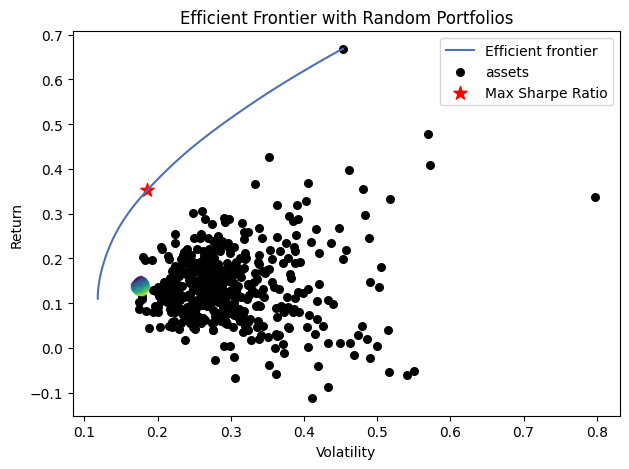

In [14]:
# Visualize our portfolio Sharp Ratio performance
mu = expected_returns.mean_historical_return(df_tech_stocks)
S = risk_models.sample_cov(df_tech_stocks)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(expected_returns=mu, cov_matrix=S, solver="ECOS")
weights = ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()

# Create a new instance for plotting the efficient frontier
ef_for_plotting = EfficientFrontier(expected_returns=mu, cov_matrix=S, solver="ECOS")

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(opt=ef_for_plotting, ax=ax, show_assets=True)

# Mark the point for max Sharpe ratio on the plot
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe Ratio")

# Generate random portfolios
n_samples = 100_000
w = np.random.dirichlet(alpha=np.ones(shape=len(mu)), size=n_samples)
rets = w.dot(mu.T)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r", alpha=0.3)

# Output
ax.set_title("Efficient Frontier with Random Portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("./figures/killer_tech_portfolio_ef_scatter_notebook.png")
plt.show()

/Users/tdafonseca/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-2Fq1uBJ6-py3.11/lib/python3.11/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


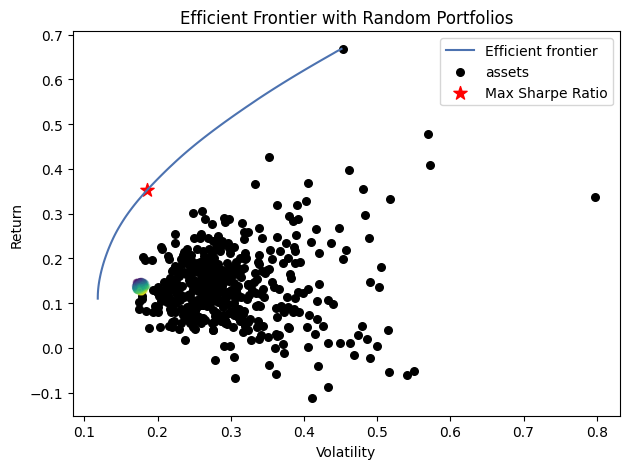

In [15]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df_tech_stocks)
S = risk_models.sample_cov(df_tech_stocks)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe(risk_free_rate=0.02)  # Set an appropriate risk-free rate
ret_tangent, std_tangent, _ = ef.portfolio_performance()

# Create a new instance for plotting
ef_for_plotting = EfficientFrontier(mu, S)

# Plotting
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef_for_plotting, ax=ax, show_assets=True)

# Mark the point for max Sharpe ratio
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe Ratio")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(alpha=np.ones(len(mu)), size=n_samples)
rets = w.dot(mu.T)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r", alpha=0.3)

# Final plot adjustments
ax.set_title("Efficient Frontier with Random Portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("./figures/tech_portfolio_ef_scatter.png")
plt.show()

key notes:

- Adjust the Scale of the Plot: If the range of returns and volatilities is too narrow, consider adjusting the axes of the plot to better visualize the spread.

- Diversify the Asset Universe: If your data is not diverse enough (e.g., all tech stocks that move similarly), the resulting portfolios might be naturally clustered. Including a wider variety of asset types can lead to a more diversified set of random portfolios.

- Covariance Matrix Adjustments: The sample covariance matrix can sometimes be noisy or ill-conditioned, leading to concentrated portfolios. Regularization techniques or using a different risk model can help spread out the random portfolios.

Make sure that the assets you include in your universe are sufficiently diverse and that the random weights are generated in a way that explores the full space of possible portfolios. If you're still not seeing the spread you expect, you may need to investigate the properties of the assets in your dataset or consider alternative methods for generating random portfolios.


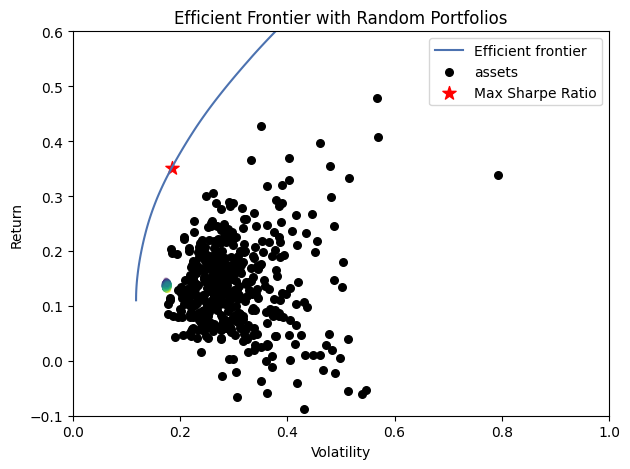

In [16]:
# Diversify the asset universe
# Assuming df_stocks is a DataFrame with prices of stocks from various sectors
mu = expected_returns.mean_historical_return(df_tech_stocks)
# Use shrinkage to obtain a better covariance matrix, get a more stable estimator
S = CovarianceShrinkage(df_tech_stocks).ledoit_wolf()

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()

# Create a new instance for plotting
ef_for_plotting = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef_for_plotting, ax=ax, show_assets=True)

# Mark the point for max Sharpe ratio
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe Ratio")

# Generate random portfolios
n_samples = 10000
w = np.random.uniform(0, 1, (n_samples, len(mu)))
w /= np.sum(w, axis=1)[:, np.newaxis]
rets = w.dot(mu.T)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r", alpha=0.3)

# Adjust the scale of the plot
ax.set_xlim(left=0, right=1)
ax.set_ylim(bottom=-0.1, top=0.6)

# Output
ax.set_title("Efficient Frontier with Random Portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("./figures/expanded_tech_portfolio_ef_scatter.png")
plt.show()